In [1]:
import torch
# from gpt import GPT
import  gpt_scheduled_sampling as sampling
import trainer as trainer
from utility_functions import get_batch, decode_characters
import ast
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:
with open('../corpora/vocab_train.txt', 'r', encoding='utf-8') as f:
    vocab = eval(f.read())

with open('../corpora/indices_text.txt', 'r') as f:
    train_dataset = f.read()

with open('../corpora/indices_text_valid.txt', 'r') as f:
    validation_set = f.read()

train_dataset = ast.literal_eval(train_dataset)
validation_set = ast.literal_eval(validation_set)
device = 'cpu'
vocab_size = len(vocab)

In [5]:
class GPTConfig:
    def __init__(self, vocab_size, **kwargs):
        self.vocab_size = vocab_size
        for key, value in kwargs.items():
            setattr(self, key, value)


In [3]:
#Define hyperparameter grid
param_grid = {
    'n_layer': [4, 8],
    'n_head': [2, 4],
    'n_embd': [128, 256],
    'learning_rate': [1e-3, 1e-4],
    'batch_size': [16, 32]
}

# Generate all combinations
keys, values = zip(*param_grid.items())
experiments = [dict(zip(keys, v)) for v in product(*values)]


In [ ]:
results = []

for i, params in enumerate(experiments):
    print("_____________________________________________")
    print(f"Running experiment {i+1}/{len(experiments)} with params: {params}")
    config = GPTConfig(
        vocab_size=vocab_size,
        n_layer=params['n_layer'],
        n_head=params['n_head'],
        n_embd=params['n_embd'],
        embd_pdrop=0.1,
        resid_pdrop=0.1,
        attn_pdrop=0.1,
        dropout=0.1,
        compile=True,
        device=device,
        num_workers=0,
        max_iters=2e4,
        batch_size=params['batch_size'],
        block_size=64,
        learning_rate=params['learning_rate'],
        betas=(0.9, 0.95),
        weight_decay=1e-1,
        grad_norm_clip=1.0
    )
    
    epochs = 3
    train_steps = 1200  

    model = sampling.GPT(config=config, device=device)
    exp_trainer = trainer.Trainer(model, train_dataset, vocab, device, val_dataset=validation_set)
    loss, perplexities = exp_trainer.run(epochs, train_steps, config.batch_size, config.block_size)
    final_perplexity = perplexities[-1] if perplexities else None
    results.append({'params': params, 'final_perplexity': final_perplexity})
    #wrize results to file after each experiment
    with open('experiment_results.txt', 'a') as f:
        f.write(f"Params: {params}, Final Perplexity: {final_perplexity}\n")

# Print sorted results
results = sorted(results, key=lambda x: x['final_perplexity'] if x['final_perplexity'] is not None else float('inf'))
for res in results:
    print(f"Params: {res['params']}, Final Perplexity: {res['final_perplexity']}")

#Use best config for final training
best_params = results[0]['params']

In [34]:
config = GPTConfig(
    vocab_size=vocab_size,
    n_layer=4,
    n_head=2,
    n_embd=256,
    embd_pdrop=0.1,
    resid_pdrop=0.1,
    attn_pdrop=0.1,
    dropout=0.1,
    compile=True,
    device=device,
    num_workers=0,
    max_iters=2e4,
    batch_size=16,
    block_size=64,
    learning_rate=0.001,
    betas=(0.9, 0.95),
    weight_decay=1e-1,
    grad_norm_clip=1.0
)

print(vocab_size, "ln: ", np.log(vocab_size))
our_gpt = sampling.GPT(config=config, device=device)

our_trainer = trainer.Trainer(our_gpt, train_dataset, vocab, device, val_dataset=validation_set)
epochs = 5
train_steps = 1000

xbatch = torch.tensor([[0]], dtype=torch.long).to(device)
loss, val_loss, perplexities = our_trainer.run(epochs, train_steps, config.batch_size, config.block_size)
generated = our_gpt.generate(xbatch, 100, 0.8, True, 20)
generated = generated[0].tolist()
decoded = decode_characters(generated, vocab)
print(decoded)


1541 ln:  7.340186835320115
Number of parameters: 3.57M
##################################################################
Epoch 1/5


Training: 100%|██████████| 1000/1000 [01:27<00:00,  4.07it/s, loss=5.38]

Validation Loss: 5.5355, Perplexity: 253.53
Generated text: 
cleopatra , to a t the of . as i am t to the , take it . what is it is the , and i am to you , and to him . i would not , and you shall . enter or , and the , and , and i have ole  what , and , , and what a of the that ? , i will you , i can go , and , and the  a , and we will be so to my , with me to my love . mark antony sotheir 
##################################################################
Epoch 2/5


Validation Loss: 5.2499, Perplexity: 190.56
Generated text: 
cleopatra i am so sweet . home . cleopatra indeed , with a scrus , and to be . i am not to the , and the of men . i will i am to have a . come , but to this , i will , my tly , it is , and the king . mark antony o , st , i am a , and that i should be . cleopatra what is the matter ; mark antony , the very good , the of the , and their es . mark antony , in the 
##################################################################
Epoch 3/5


Training: 100%|██████████| 1000/1000 [01:26<00:00,  4.16it/s, loss=4.63]

Validation Loss: 5.1287, Perplexity: 168.79
Generated text: 
cleopatra good , 'tis not so : mark antony . , what a ms   sola  is it so ? mark antony i have the h'd . domitius enobarbus this is the news ; and , he was a woman : the was a man that he better than the , he hath a better , and the cause of the lord and his . exeunt scene ii . the same . a room in the . enter cleopatra , charmian , mark antony , , and cleopatra . cleopatra o , my lord , i 
##################################################################
Epoch 4/5


Validation Loss: 5.1267, Perplexity: 168.45
Generated text: 
cleopatra , 'puppet .' mark me this ,' sir . cleopatra i have done the die of this . mark antony matter is toral , thou hast done this . mark antony and domitius enobarbus mark antony put this , and let me see ; and this night gross , sir , and the queen . domitius enobarbus i am i a menas and ready , that would be with his used my , not to word . mark antony , i will not live . domitius enobarbus i will not me . 
##################################################################
Epoch 5/5


Training: 100%|█████████▉| 999/1000 [01:27<00:00, 10.58it/s, loss=4.06]

Validation Loss: 5.1267, Perplexity: 168.46


Generated text: 
cleopatra give him bidding : lemses , and let us , and we shall not do them . cleopatra i shall . exit with all my heart , that we have done the thou ew thy est commend the of an idthere's ts , which , when thou wa, and now i'll say'st ; but , with such farom's , that thou hast done me , and not me . what , ho  come , ho  they fight ran the could ter here , ho  and ,  


cleopatra o , i him . exeunt scene v . venice . before . enter cleopatra , charmian , and , charmian , and as cleopatra , charmian , come , and antonar as mole , and oswear , come ; our seforth , our thou not the no more than our . cleopatra go to . charmian , to make thee good : we'll heave is the carrion : this is the very day . charmian good madam , madam . cleopatra , madam ? cleopatra give me my house . cleopatra 


In [35]:
import torch
import torch.nn.functional as F
import math

def perplexity(model, test_indices, device, block_size):
    model.eval()
    test_indices = torch.tensor(test_indices, dtype=torch.long, device=device)
    total_log_prob = 0.0
    total_predicted = 0

    # Slide a window across test_indices
    with torch.no_grad():
        for start in range(0, len(test_indices) - 1, block_size):
            end = min(start + block_size, len(test_indices) - 1)
            context = test_indices[start:end + 1]  # +1 because we'll predict each next token in the block
            # context shape: [block_len + 1]
            inputs = context[:-1].unsqueeze(0)    # Exclude last token (batch size 1)
            targets = context[1:]                 # Exclude first token
            
            logits, _ = model(inputs)
            logits = logits[0]  # (block_len, vocab_size)
            log_probs = F.log_softmax(logits, dim=-1)
            selected_log_probs = log_probs[range(len(targets)), targets]
            
            total_log_prob += selected_log_probs.sum().item()
            total_predicted += len(targets)

    avg_log_prob = total_log_prob / total_predicted
    perplexity = math.exp(-avg_log_prob)
    return perplexity

print(perplexity(our_gpt, validation_set, device, config.block_size))

169.26600420490072


In [36]:
# Save the model
torch.save(our_gpt.state_dict(), "gpt_scheduled_sampling_model.pth")

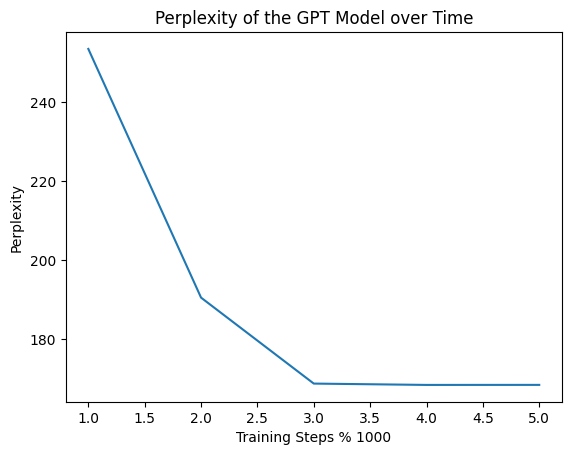

In [37]:

# Plot perplexity
y = np.arange(1, len(perplexities)+1)
plt.plot(y, perplexities)
plt.xlabel('Training Steps % 1000')
plt.ylabel('Perplexity')
plt.title('Perplexity of the GPT Model over Time')
plt.savefig('perplexity_scheduled_sampling.png')
plt.show()



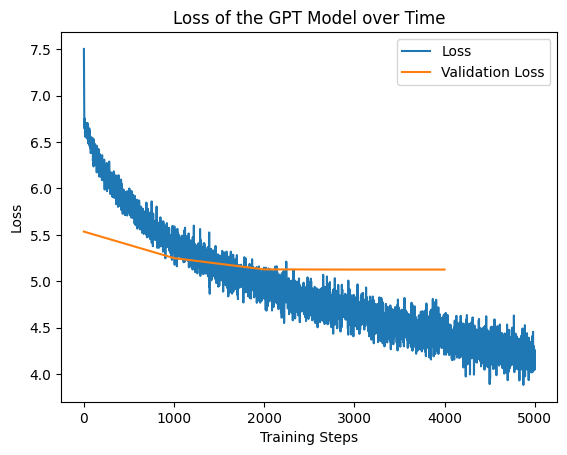

In [38]:
y = np.arange(1, len(loss)+1)
plt.plot(y, loss, label='Loss')
# Plot val_loss every 1000 steps
val_x = np.arange(len(val_loss)) * 1000
plt.plot(val_x, val_loss, label='Validation Loss')
plt.xlabel('Training Steps')
plt.legend()
plt.ylabel('Loss')
plt.title('Loss of the GPT Model over Time')
plt.savefig('loss_scheduled sampling.png')
plt.show()



In [ ]:
with open('gpz_model.txt', 'w') as f:
    f.write(decoded)